In [40]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# For data visualization
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns; sns.set()
# Plotly for interactive graphics 
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

import missingno as msno
import warnings
warnings.filterwarnings("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/weather-dataset-rattle-package/weatherAUS.csv


In [41]:

data=pd.read_csv("../input/weather-dataset-rattle-package/weatherAUS.csv")
df=data.copy().sample(1000)
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
53404,2012-09-03,MountGinini,-0.4,8.1,0.2,NaN,NaN,SW,54.0,SW,...,63.0,53.0,NaN,NaN,NaN,NaN,4.1,6.3,No,No
69517,2015-02-01,Melbourne,NaN,NaN,NaN,6.6,0.3,S,50.0,WSW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
132591,2016-04-12,Hobart,10.6,18.7,0.0,3.4,5.6,SW,39.0,N,...,65.0,39.0,1021.8,1021.9,1.0,6.0,14.6,16.8,No,No
76929,2014-08-01,Portland,4.3,9.8,20.0,2.0,5.0,SSW,69.0,SW,...,67.0,62.0,1004.7,1014.7,8.0,1.0,8.5,9.3,Yes,No
144088,2013-09-23,Uluru,14.3,36.0,0.0,NaN,NaN,NW,59.0,SW,...,11.0,7.0,1009.2,1005.7,NaN,NaN,27.6,34.9,No,No


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 53404 to 47479
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1000 non-null   object 
 1   Location       1000 non-null   object 
 2   MinTemp        993 non-null    float64
 3   MaxTemp        991 non-null    float64
 4   Rainfall       976 non-null    float64
 5   Evaporation    538 non-null    float64
 6   Sunshine       490 non-null    float64
 7   WindGustDir    934 non-null    object 
 8   WindGustSpeed  934 non-null    float64
 9   WindDir9am     947 non-null    object 
 10  WindDir3pm     978 non-null    object 
 11  WindSpeed9am   991 non-null    float64
 12  WindSpeed3pm   980 non-null    float64
 13  Humidity9am    987 non-null    float64
 14  Humidity3pm    975 non-null    float64
 15  Pressure9am    895 non-null    float64
 16  Pressure3pm    896 non-null    float64
 17  Cloud9am       610 non-null    float64
 18  Clo

In [43]:
df.isnull().sum()

Date               0
Location           0
MinTemp            7
MaxTemp            9
Rainfall          24
Evaporation      462
Sunshine         510
WindGustDir       66
WindGustSpeed     66
WindDir9am        53
WindDir3pm        22
WindSpeed9am       9
WindSpeed3pm      20
Humidity9am       13
Humidity3pm       25
Pressure9am      105
Pressure3pm      104
Cloud9am         390
Cloud3pm         421
Temp9am            9
Temp3pm           21
RainToday         24
RainTomorrow      19
dtype: int64

In [44]:
df["RainToday"].value_counts()

No     738
Yes    238
Name: RainToday, dtype: int64

In [45]:
df.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.723725,0.133044,0.501531,0.004865,0.120548,0.122006,0.169470,-0.178613,0.084224,-0.409508,-0.426201,0.089145,0.015363,0.900534,0.692815
MaxTemp,0.723725,1.000000,-0.066975,0.633823,0.429672,-0.011042,-0.026783,0.010452,-0.457007,-0.433298,-0.276805,-0.384209,-0.345228,-0.284645,0.885500,0.982269
Rainfall,0.133044,-0.066975,1.000000,-0.159404,-0.229039,0.188485,0.089502,0.129720,0.236653,0.243444,-0.229174,-0.161284,0.232699,0.190090,0.028415,-0.068419
Evaporation,0.501531,0.633823,-0.159404,1.000000,0.363857,0.156487,0.159431,0.110083,-0.505958,-0.353048,-0.277625,-0.297520,-0.230308,-0.203086,0.603707,0.613746
Sunshine,0.004865,0.429672,-0.229039,0.363857,1.000000,-0.102427,-0.037985,-0.011148,-0.473507,-0.625624,0.111208,0.061236,-0.731145,-0.722649,0.221358,0.455441
WindGustSpeed,0.120548,-0.011042,0.188485,0.156487,-0.102427,1.000000,0.602848,0.704667,-0.155157,0.031217,-0.482151,-0.426679,0.196054,0.154605,0.082423,-0.049351
WindSpeed9am,0.122006,-0.026783,0.089502,0.159431,-0.037985,0.602848,1.000000,0.523341,-0.230787,-0.014941,-0.217051,-0.164352,0.063420,0.073354,0.079508,-0.031228
WindSpeed3pm,0.169470,0.010452,0.129720,0.110083,-0.011148,0.704667,0.523341,1.000000,-0.081039,0.077177,-0.334937,-0.283869,0.168946,0.117689,0.138130,-0.015349
Humidity9am,-0.178613,-0.457007,0.236653,-0.505958,-0.473507,-0.155157,-0.230787,-0.081039,1.000000,0.657614,0.115300,0.173834,0.450545,0.367322,-0.420574,-0.454519
Humidity3pm,0.084224,-0.433298,0.243444,-0.353048,-0.625624,0.031217,-0.014941,0.077177,0.657614,1.000000,-0.053121,0.021633,0.519382,0.501194,-0.150570,-0.489795


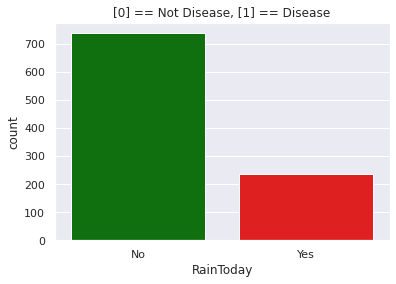

In [46]:
sns.countplot(df.RainToday, palette=['green', 'red'])
plt.title("[0] == Not Disease, [1] == Disease");

(16.5, -0.5)

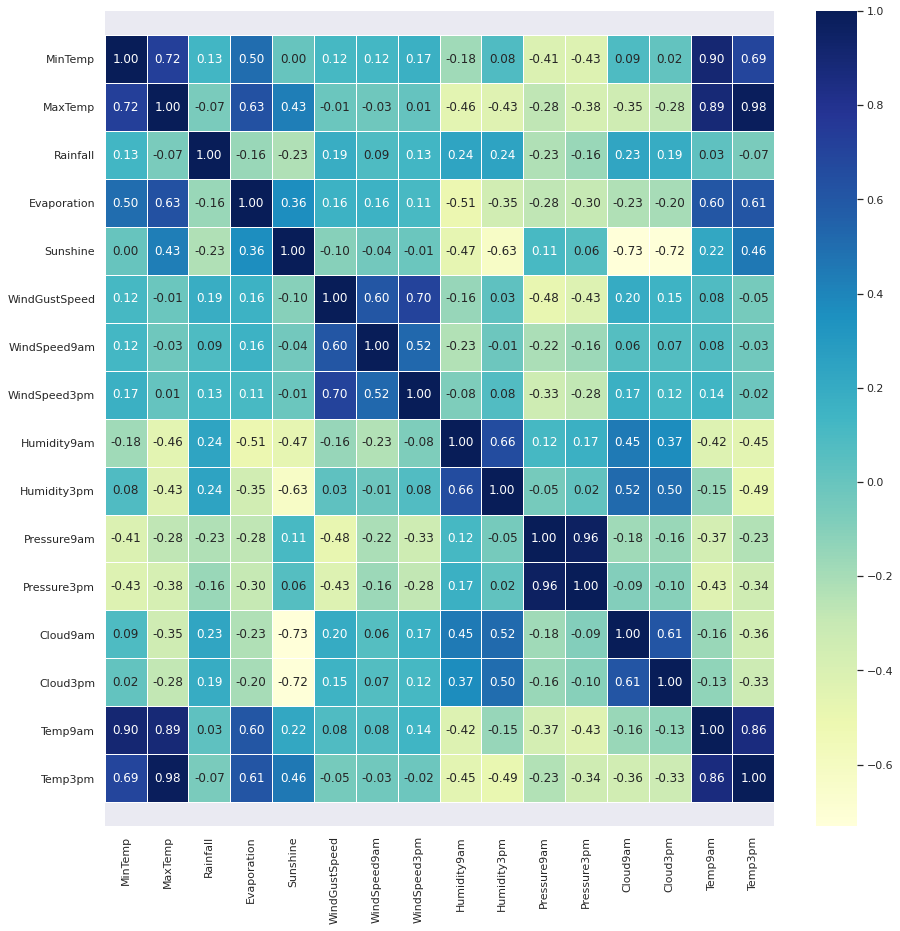

In [47]:

corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [48]:

df.dropna(subset=['RainToday', 'RainTomorrow'], inplace=True)
df[['RainToday', 'RainTomorrow']].isnull().sum()

RainToday       0
RainTomorrow    0
dtype: int64

In [49]:

def summary(df):
    Types = df.dtypes
    Counts = df.apply(lambda x: x.count())
    Min = df.min()
    Max = df.max()
    Uniques = df.apply(lambda x: x.unique().shape[0]) # .shape[0] yazilmaz ise unique olan degerlerin listelerini getirir.
    Nulls = df.apply(lambda x: x.isnull().sum())

    cols = ['Types', 'Counts', 'Uniques', 'Nulls', 'Min', 'Max']
    str = pd.concat([Types, Counts, Uniques, Nulls, Min, Max], axis = 1, sort=True)

    str.columns = cols
    display(str.sort_values(by='Nulls', ascending=False))
    print('__________Data Types__________\n')
    print(str.Types.value_counts())
summary(df)

,Types,Counts,Uniques,Nulls,Min,Max
Sunshine,float64,479,131,488,0.0,13.9
Evaporation,float64,527,77,440,0.0,24.0
Cloud3pm,float64,568,10,399,0.0,8.0
Cloud9am,float64,598,10,369,0.0,8.0
Pressure3pm,float64,869,281,98,986.1,1035.7
Pressure9am,float64,869,282,98,988.9,1037.1
WindGustSpeed,float64,907,45,60,13.0,98.0
WindGustDir,object,907,17,60,NaN,NaN
WindDir9am,object,918,17,49,NaN,NaN
Humidity3pm,float64,947,99,20,1.0,100.0


__________Data Types__________

float64    16
object      7
Name: Types, dtype: int64


In [50]:
from sklearn.preprocessing import LabelEncoder


lbe = LabelEncoder()
df["RainToday_label"] = lbe.fit_transform(df["RainToday"])
df["RainTomorrow_label"] = lbe.fit_transform(df["RainTomorrow"])

In [51]:
df.drop(['Location','WindDir9am','WindDir3pm'], axis=1, inplace=True) 

df = pd.get_dummies(df, drop_first=True, columns = ['WindGustDir'], prefix = ['WindGustDir'])

In [52]:
#drop unnecessary columns and date columns
df_imputation = df.drop(['Date','RainToday','RainTomorrow'], axis=1) 



In [53]:

def summary(df):
    Types = df.dtypes
    Counts = df.apply(lambda x: x.count())
    Min = df.min()
    Max = df.max()
    Uniques = df.apply(lambda x: x.unique().shape[0]) # .shape[0] yazilmaz ise unique olan degerlerin listelerini getirir.
    Nulls = df.apply(lambda x: x.isnull().sum())

    cols = ['Types', 'Counts', 'Uniques', 'Nulls', 'Min', 'Max']
    str = pd.concat([Types, Counts, Uniques, Nulls, Min, Max], axis = 1, sort=True)

    str.columns = cols
    display(str.sort_values(by='Nulls', ascending=False))
    print('__________Data Types__________\n')
    print(str.Types.value_counts())
summary(df)

,Types,Counts,Uniques,Nulls,Min,Max
Sunshine,float64,479,131,488,0.0,13.9
Evaporation,float64,527,77,440,0.0,24.0
Cloud3pm,float64,568,10,399,0.0,8.0
Cloud9am,float64,598,10,369,0.0,8.0
Pressure3pm,float64,869,281,98,986.1,1035.7
Pressure9am,float64,869,282,98,988.9,1037.1
WindGustSpeed,float64,907,45,60,13.0,98.0
Humidity3pm,float64,947,99,20,1.0,100.0
WindSpeed3pm,float64,949,30,18,0.0,56.0
Temp3pm,float64,950,274,17,-1.2,41.6


__________Data Types__________

float64    16
uint8      15
object      3
int64       2
Name: Types, dtype: int64


In [54]:
#label encoding for univariate variables
from sklearn.preprocessing import LabelEncoder


lbe = LabelEncoder()
df["RainToday_label"] = lbe.fit_transform(df["RainToday"])
df["RainTomorrow_label"] = lbe.fit_transform(df["RainTomorrow"])

In [56]:
def summary(df):
    Types = df.dtypes
    Counts = df.apply(lambda x: x.count())
    Min = df.min()
    Max = df.max()
    Uniques = df.apply(lambda x: x.unique().shape[0]) # .shape[0] yazilmaz ise unique olan degerlerin listelerini getirir.
    Nulls = df.apply(lambda x: x.isnull().sum())

    cols = ['Types', 'Counts', 'Uniques', 'Nulls', 'Min', 'Max']
    str = pd.concat([Types, Counts, Uniques, Nulls, Min, Max], axis = 1, sort=True)

    str.columns = cols
    display(str.sort_values(by='Nulls', ascending=False))
    print('__________Data Types__________\n')
    print(str.Types.value_counts())
summary(df)

,Types,Counts,Uniques,Nulls,Min,Max
Sunshine,float64,479,131,488,0.0,13.9
Evaporation,float64,527,77,440,0.0,24.0
Cloud3pm,float64,568,10,399,0.0,8.0
Cloud9am,float64,598,10,369,0.0,8.0
Pressure3pm,float64,869,281,98,986.1,1035.7
Pressure9am,float64,869,282,98,988.9,1037.1
WindGustSpeed,float64,907,45,60,13.0,98.0
Humidity3pm,float64,947,99,20,1.0,100.0
WindSpeed3pm,float64,949,30,18,0.0,56.0
Temp3pm,float64,950,274,17,-1.2,41.6


__________Data Types__________

float64    16
uint8      15
object      3
int64       2
Name: Types, dtype: int64


In [57]:
# DecisionTreeRegressor

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.tree import DecisionTreeRegressor

#drop unnecessary columns and date columns
df_imputation = df.drop(['Date','RainToday','RainTomorrow'], axis=1) 

#define variables to keep the index and the columns
index = df_imputation.index
columns = df_imputation.columns

#imputation steps
imp_tree = IterativeImputer(random_state=0, estimator=DecisionTreeRegressor())
imp_tree.fit(df_imputation)
df_imputed = imp_tree.transform(df_imputation)

#transform imputed data in array format to dataframe
df_imputed_tree = pd.DataFrame(df_imputed, index=index, columns=columns)

df_imputed_tree.isnull().sum()

MinTemp               0
MaxTemp               0
Rainfall              0
Evaporation           0
Sunshine              0
WindGustSpeed         0
WindSpeed9am          0
WindSpeed3pm          0
Humidity9am           0
Humidity3pm           0
Pressure9am           0
Pressure3pm           0
Cloud9am              0
Cloud3pm              0
Temp9am               0
Temp3pm               0
RainToday_label       0
RainTomorrow_label    0
WindGustDir_ENE       0
WindGustDir_ESE       0
WindGustDir_N         0
WindGustDir_NE        0
WindGustDir_NNE       0
WindGustDir_NNW       0
WindGustDir_NW        0
WindGustDir_S         0
WindGustDir_SE        0
WindGustDir_SSE       0
WindGustDir_SSW       0
WindGustDir_SW        0
WindGustDir_W         0
WindGustDir_WNW       0
WindGustDir_WSW       0
dtype: int64

In [58]:

df_imputed_tree.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 967 entries, 53404 to 47479
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MinTemp             967 non-null    float64
 1   MaxTemp             967 non-null    float64
 2   Rainfall            967 non-null    float64
 3   Evaporation         967 non-null    float64
 4   Sunshine            967 non-null    float64
 5   WindGustSpeed       967 non-null    float64
 6   WindSpeed9am        967 non-null    float64
 7   WindSpeed3pm        967 non-null    float64
 8   Humidity9am         967 non-null    float64
 9   Humidity3pm         967 non-null    float64
 10  Pressure9am         967 non-null    float64
 11  Pressure3pm         967 non-null    float64
 12  Cloud9am            967 non-null    float64
 13  Cloud3pm            967 non-null    float64
 14  Temp9am             967 non-null    float64
 15  Temp3pm             967 non-null    float64
 16  Ra

In [59]:
df_imputed_tree.isnull().sum()

MinTemp               0
MaxTemp               0
Rainfall              0
Evaporation           0
Sunshine              0
WindGustSpeed         0
WindSpeed9am          0
WindSpeed3pm          0
Humidity9am           0
Humidity3pm           0
Pressure9am           0
Pressure3pm           0
Cloud9am              0
Cloud3pm              0
Temp9am               0
Temp3pm               0
RainToday_label       0
RainTomorrow_label    0
WindGustDir_ENE       0
WindGustDir_ESE       0
WindGustDir_N         0
WindGustDir_NE        0
WindGustDir_NNE       0
WindGustDir_NNW       0
WindGustDir_NW        0
WindGustDir_S         0
WindGustDir_SE        0
WindGustDir_SSE       0
WindGustDir_SSW       0
WindGustDir_SW        0
WindGustDir_W         0
WindGustDir_WNW       0
WindGustDir_WSW       0
dtype: int64

In [60]:
df2 = df_imputed_tree.copy()
x_dat = df2.drop(['RainTomorrow_label'],axis=1)
y = df2["RainTomorrow_label"].values

In [61]:
summary(df2)

,Types,Counts,Uniques,Nulls,Min,Max
Cloud3pm,float64,967,9,0,0.0,8.0
WindGustDir_N,float64,967,2,0,0.0,1.0
WindSpeed3pm,float64,967,29,0,0.0,56.0
WindGustSpeed,float64,967,44,0,13.0,98.0
WindGustDir_WSW,float64,967,2,0,0.0,1.0
WindGustDir_WNW,float64,967,2,0,0.0,1.0
WindGustDir_W,float64,967,2,0,0.0,1.0
WindGustDir_SW,float64,967,2,0,0.0,1.0
WindGustDir_SSW,float64,967,2,0,0.0,1.0
WindGustDir_SSE,float64,967,2,0,0.0,1.0


__________Data Types__________

float64    33
Name: Types, dtype: int64


In [62]:
#If there is a outlier values, it must be done before coming here
x=(x_dat-np.min(x_dat))/(np.max(x_dat)-np.min(x_dat)).values

In [63]:
from sklearn.model_selection import train_test_split,cross_val_score,ShuffleSplit,GridSearchCV
from sklearn.metrics import accuracy_score,mean_squared_error,roc_curve,roc_auc_score,classification_report,r2_score,confusion_matrix

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [64]:
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression() #default olanlar gelir.C var..
lr_model.fit(x_train,y_train)

LogisticRegression()

In [65]:
print(lr_model.intercept_)
print(lr_model.coef_)

[-5.01920224]
[[ 0.22291755  0.24997995 -0.30879409 -0.18025427 -0.87118805  1.77964403
   0.25638066  0.46022146  0.87043936  3.49286348 -0.45791491 -1.36339797
   0.81980177  0.49740017  0.7073585  -0.12619856  0.32503324  0.25313866
  -0.23323489  0.75129889  0.23370626  1.16725674 -0.01068219  0.86544367
  -0.37237991  0.15455617  0.32601872  0.16589999 -0.05617783  0.52175414
   0.54921865  0.33840942]]


In [67]:
y_pred=lr_model.predict(x_test)

y_pred[0:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [68]:
LR = accuracy_score(y_test,y_pred)
LR

0.8350515463917526

In [69]:
y_probs = lr_model.predict_proba(x_test)[:,1]
y_probs


array([0.04919207, 0.04018451, 0.02180677, 0.0348576 , 0.46220361,
       0.31111251, 0.01416917, 0.47202047, 0.05383518, 0.16619398,
       0.0567922 , 0.05562947, 0.57646257, 0.37441604, 0.15068599,
       0.03330987, 0.27338158, 0.14990682, 0.17560691, 0.02498183,
       0.0138754 , 0.39406886, 0.30586414, 0.13833744, 0.11629803,
       0.3749662 , 0.1918105 , 0.07342761, 0.78239977, 0.14306114,
       0.0154219 , 0.63036861, 0.11659085, 0.84486847, 0.03501361,
       0.06724258, 0.09448375, 0.47778783, 0.01592456, 0.16103126,
       0.16144129, 0.13419569, 0.26661143, 0.39481983, 0.02241413,
       0.01377416, 0.60002287, 0.01806096, 0.21019706, 0.62247337,
       0.59363398, 0.03348695, 0.16662759, 0.45272792, 0.08647392,
       0.35899861, 0.33298274, 0.03765383, 0.56125072, 0.07140502,
       0.24884848, 0.54487796, 0.0191299 , 0.18418518, 0.2153441 ,
       0.25028185, 0.84869403, 0.08214514, 0.02037651, 0.28708564,
       0.71300657, 0.06235558, 0.00681333, 0.29748561, 0.03619

In [70]:
y_pred = [1 if i >0.70 else 0 for i in y_probs]
y_pred[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [71]:
log_score = accuracy_score(y_test,y_pred)
print ("log score=",log_score)

log score= 0.845360824742268


In [72]:
confusion_matrix(y_test,y_pred)

array([[229,   0],
       [ 45,  17]])

In [73]:
lr_model = LogisticRegression(solver = "liblinear")
lr_model= lr_model.fit(x_train,y_train)
lr_model

LogisticRegression(solver='liblinear')

In [74]:
accuracy_score(y_test, lr_model.predict(x_test))

0.8281786941580757

In [75]:
#Cross validation (10 katli ) yaparsak
lr_finalscore=cross_val_score(lr_model, x_test, y_test, cv = 10).mean()
lr_finalscore

0.8313793103448276

In [76]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model = nb_model.fit(x_train, y_train)
nb_model

GaussianNB()

In [78]:
y_pred = nb_model.predict(x_test)
y_pred

array([0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0.,
       1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0.,
       1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1.,
       0., 0., 0., 1., 0.

In [79]:
NB = accuracy_score(y_test,y_pred)
NB

0.7285223367697594

In [80]:
confusion_matrix(y_test,y_pred)

array([[171,  58],
       [ 21,  41]])

In [81]:

# 10 katli cross validation.
nb_finalscore=cross_val_score(nb_model, x_test, y_test, cv = 10).mean()
nb_finalscore

0.687816091954023

In [82]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model = knn_model.fit(x_train, y_train)
?knn_model

Type:        KNeighborsClassifier
String form: KNeighborsClassifier()
File:        /opt/conda/lib/python3.7/site-packages/sklearn/neighbors/_classification.py
Docstring:  
Classifier implementing the k-nearest neighbors vote.

Read more in the :ref:`User Guide <classification>`.

Parameters
----------
n_neighbors : int, default=5
    Number of neighbors to use by default for :meth:`kneighbors` queries.

weights : {'uniform', 'distance'} or callable, default='uniform'
    weight function used in prediction.  Possible values:

    - 'uniform' : uniform weights.  All points in each neighborhood
      are weighted equally.
    - 'distance' : weight points by the inverse of their distance.
      in this case, closer neighbors of a query point will have a
      greater influence than neighbors which are further away.
    - [callable] : a user-defined function which accepts an
      array of distances, and returns an array of the same shape
      containing the weights.

algorithm : {'auto', 

In [83]:

y_pred = knn_model.predict(x_test)

In [84]:
KNN = accuracy_score(y_test, y_pred)
KNN

0.7869415807560137

In [85]:
confusion_matrix(y_test,y_pred)

array([[207,  22],
       [ 40,  22]])

In [86]:
knn_params = {"n_neighbors": np.arange(1,50)}

In [87]:
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, knn_params, cv=10)
knn_cv.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [88]:
print("The best score:" + str(knn_cv.best_score_))
print("The best parameters: " + str(knn_cv.best_params_))

The best score:0.7988366988586479
The best parameters: {'n_neighbors': 49}


In [89]:
knn = KNeighborsClassifier(3)  #we choose 3 neigboors. I think 1 is not good 
knn_tuned = knn.fit(x_train, y_train)

In [90]:

knn_finalscore=knn_tuned.score(x_test, y_test)
knn_finalscore

0.7731958762886598

In [91]:
from sklearn.svm import SVC

svm_model = SVC().fit(x_train,y_train)#we choose default c:1,kernel:'rbf',dagree:3...
#?svm_model

In [92]:
y_pred = svm_model.predict(x_test)

In [93]:
SVC = accuracy_score(y_test,y_pred)
SVC

0.8316151202749141

In [ ]:

svc_params = {"C": np.arange(1,10)}

svc = SVC(kernel = "rbf")

svc_cv_model = GridSearchCV(svc,svc_params, 
                            cv = 10, 
                            n_jobs = -1,        
                            verbose = 2 )

svc_cv_model.fit(x_train, y_train)

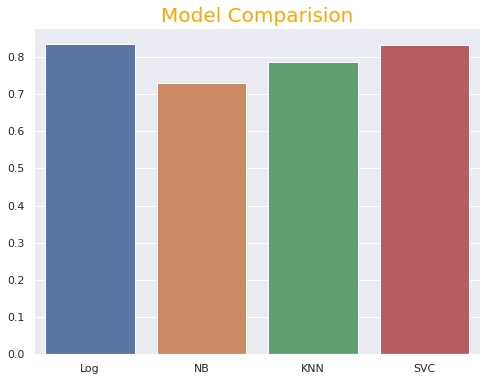

In [97]:
indexx = ["Log","NB","KNN","SVC"]
regressions = [LR,NB,KNN,SVC]

plt.figure(figsize=(8,6))
sns.barplot(x=indexx,y=regressions)

plt.xticks()
plt.title('Model Comparision',color = 'orange',fontsize=20);